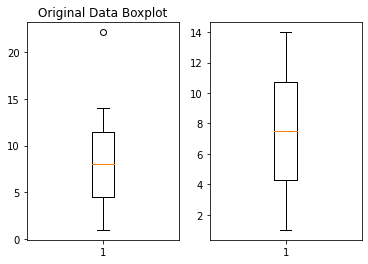

In [ ]:
# 이상치 처리에 대해서 알아보아요!
import numpy as np
import matplotlib.pyplot as plt

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22.1])

figure = plt.figure()

ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)

ax1.set_title('Original Data Boxplot')
ax1.boxplot(data)

# numpy로 사분위 값을 구해서 Turkey Fence 방식으로 이상치를 판단해 보아요!
first = np.percentile(data, 25)  # 1사분위 값을 구해요!
third = np.percentile(data, 75)  # 3사분위 값을 구해요!
IQR_value = third - first

upper_fence = third + (IQR_value * 1.5)
lower_fence = first - (IQR_value * 1.5)

# boolean indexing을 이용해서 이상치를 추출해보아요!
# print(data[(data > upper_fence) | (data < lower_fence)])   # array([22.1])
# boolean indexing을 이용해서 이상치를 제거하고 나머지 데이터를 추출해요!
result = data[(data <= upper_fence) & (data >= lower_fence)]
ax2.boxplot(result)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22.1])

mean = data.mean() # 8.473333333333333
std = data.std()   # 5.331974826980671

zscore_data = (data - mean) / std

print(zscore_data)

[-1.40160702 -1.21405925 -1.02651147 -0.8389637  -0.65141593 -0.46386816
 -0.27632038 -0.08877261  0.09877516  0.28632293  0.4738707   0.66141848
  0.84896625  1.03651402  2.55565098]


In [ ]:
# scipy는 sklearn과 유사한 통계전용 모듈

from scipy import stats

data = np.array([-10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22.1])

zscore_threshold = 2.0 # 일반적인 기준.

outlier = data[np.abs(stats.zscore(data)) > zscore_threshold]
print(outlier)

data[np.isin(data, outlier, invert=True)]

[-10.   22.1]


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.])

In [ ]:
### 온도에 따른 오존량 예측 ==> Python 구현
### 결측치 처리와 이상치 처리도 같이 진행!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

################################################
# 다변수 함수에 대한 수치미분을 수행하는 함수
def numerical_derivative(f,x):    # x : ndarray [1.0  2.0]
    
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)   # derivative_x : [0.0  0.0]
    
    # iterator를 이용해서 입력변수 x에 대한 편미분을 수행!
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        
        idx = it.multi_index 
        tmp = x[idx]              # tmp : 1.0
        
        x[idx] = tmp + delta_x    # x : ndarray [1.0001  2.0]
        fx_plus_delta = f(x)
        
        x[idx] = tmp - delta_x    # x : ndarray [0.9999  2.0]  
        fx_minus_delta = f(x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp              #  x : ndarray [1.0  2.0]  
        it.iternext()
        
    return derivative_x
################################################

# Raw Data Set Loading
df = pd.read_csv('./data/ozone.csv')
training_data = df[['Ozone', 'Temp']]

# 데이터에 결치값이 존재해요!
# 여기서는 결치값을 삭제할꺼예요!
training_data.dropna(how='any',
                     inplace=True)   # how='any' : 결치가 존재하는 행을 삭제

# 데이터에 이상치가 있는지 확인하고 제거
zscore_threshold = 2.0
outlier = training_data['Ozone'][(np.abs(stats.zscore(training_data['Ozone'])) > zscore_threshold)]
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]


# Training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# Weight, bias
W = np.random.rand(1,1)
b = np.random.rand(1)

# loss function
def loss_func(input_data):
    W = input_data[0].reshape(1,1)
    b = input_data[1]
    
    y = np.dot(x_data,W) + b
    return np.mean(np.power(t_data-y,2))

# predict
def predict(x):
    y = np.dot(x,W) + b
    return y

# learning_rate
learning_rate = 1e-4

# 반복 학습
for step in range(300000):
    
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)  # [W b]
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(1,1)
    b = b - derivative_result[1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b:{}, loss:{}'.format(W, b, loss_func(input_param)))


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


W : [[0.55614297]], b:[0.89386504], loss:523.2316692063906
W : [[0.62397044]], b:[-9.76552105], loss:457.28633131742635
W : [[0.74833828]], b:[-19.52807055], loss:425.4916857424748
W : [[0.86225157]], b:[-28.46996578], loss:398.81777799251915
W : [[0.96658915]], b:[-36.66019215], loss:376.4398793893182
W : [[1.06215596]], b:[-44.16193606], loss:357.66608926619807
W : [[1.14968928]], b:[-51.03307234], loss:341.9159421310811
W : [[1.22986442]], b:[-57.3266108], loss:328.70246029547104
W : [[1.30329992]], b:[-63.09110517], loss:317.6170970463091
W : [[1.37056233]], b:[-68.37102767], loss:308.3171048190977


In [ ]:
# 학습종료 후 예측 (Temp : 62)
predict_data = predict(np.array([[62]]))
print('온도가 62일때 오존량 : {}'.format(predict_data))  # [[16.88715564]]
                                                         # [[15.52149525]] 

온도가 62일때 오존량 : [[15.5874947]]


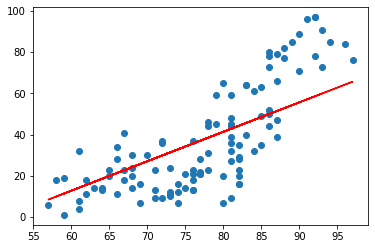

In [ ]:
# 그래프로 표현해 보아요!
plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), x_data.ravel()*W.ravel() + b, color='r')
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


sklearn으로 구한 온도가 62도 일때의 오존량 : [[4.51299041]]


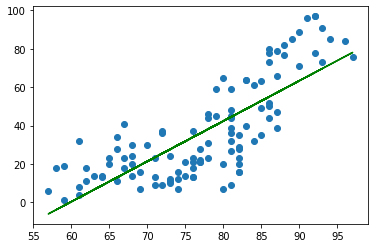

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv('./data/ozone.csv')
training_data = df[['Ozone', 'Temp']]
training_data.dropna(how='any',
                     inplace=True)   # how='any' : 결치가 존재하는 행을 삭제

# 데이터에 이상치가 있는지 확인하고 제거
zscore_threshold = 2.0
outlier = training_data['Ozone'][(np.abs(stats.zscore(training_data['Ozone'])) > zscore_threshold)]
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]


# Training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# model 생성
model = linear_model.LinearRegression()

# model 학습
model.fit(x_data, t_data)

# 예측
result = model.predict(np.array([[62]]))
print('sklearn으로 구한 온도가 62도 일때의 오존량 : {}'.format(result))  
# [[3.58411393]]   =>  [[4.51299041]]

# 그래프 표현
plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), 
         x_data.ravel()*model.coef_.ravel() + model.intercept_, color='g')
plt.show()

In [ ]:
### 일단 Min-Max Scaling 작업을 어떻게 하면 되는지 알아보아요!!!
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic[['age', 'fare']]

display(df.head())

def min_max(s):
    return (s - s.min()) / (s.max() - s.min())

result = df.apply(min_max, axis=0)

display(result.head())

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


W : [[0.64220919]], b:[0.66199166], loss:0.41045005914912164
W : [[0.5016858]], b:[0.12669481], loss:0.036079867773617595
W : [[0.58804899]], b:[0.08045434], loss:0.03286257243156074
W : [[0.65458262]], b:[0.04506031], loss:0.03095858669327292
W : [[0.70576658]], b:[0.01783198], loss:0.0298317828393833
W : [[0.7451421]], b:[-0.0031146], loss:0.029164925467701136
W : [[0.77543344]], b:[-0.01922869], loss:0.02877027048615161
W : [[0.79873639]], b:[-0.03162515], loss:0.028536708466631647
W : [[0.81666321]], b:[-0.04116168], loss:0.028398483385199614
W : [[0.8304542]], b:[-0.04849807], loss:0.028316679960241405


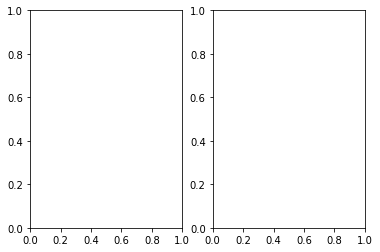

In [ ]:
## 1. sklearn 구현 ##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model  # LinearRegression 모델
from scipy import stats    # 이상치 처리
from sklearn.preprocessing import MinMaxScaler  # 정규화 처리

####### 그래프 
figure = plt.figure()

python_ax = figure.add_subplot(1,2,1)
sklearn_ax = figure.add_subplot(1,2,2)
#######

df = pd.read_csv('./data/ozone.csv')
training_data = df.copy()
training_data.dropna(how='any',
                     inplace=True)   # how='any' : 결치가 존재하는 행을 삭제

# 데이터에 이상치가 있는지 확인하고 제거
zscore_threshold = 2.0
outlier = training_data['Ozone'][(np.abs(stats.zscore(training_data['Ozone'])) > zscore_threshold)]
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]

# 정규화 처리를 해야 해요!
# display(training_data.head())
# 일단 scaler를 만들어요!
scaler_x = MinMaxScaler()   # 온도 처리를 위한 scaler(독립변수들을 위한 scaler)
scaler_t = MinMaxScaler()   # 오존량 처리를 위한 scaler(종속변수를 위한 scaler)

scaler_x.fit(training_data['Temp'].values.reshape(-1,1))
scaler_t.fit(training_data['Ozone'].values.reshape(-1,1))

scaled_Temp = scaler_x.transform(training_data['Temp'].values.reshape(-1,1))
scaled_Ozone = scaler_t.transform(training_data['Ozone'].values.reshape(-1,1))

training_data['Temp'] = scaled_Temp
training_data['Ozone'] = scaled_Ozone

#####################################

# Training Data Set
x_data = training_data.iloc[:, 1:]
t_data = training_data['Ozone'].values.reshape(-1,1)

# Weight, bias
W = np.random.rand(1,1)
b = np.random.rand(1)

# loss function
def loss_func(input_data):
    W = input_data[0].reshape(1,1)
    b = input_data[1]
    
    y = np.dot(x_data,W) + b
    return np.mean(np.power(t_data-y,2))

# predict
def predict(x):
    y = np.dot(x,W) + b
    return y

# learning_rate
learning_rate = 1e-4

# 반복 학습
for step in range(300000):
    
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)  # [W b]
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(1,1)
    b = b - derivative_result[1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b:{}, loss:{}'.format(W, b, loss_func(input_param)))

In [ ]:
import pandas as pd
import seaborn as sns

df1 = titanic[['age', 'fare']]

display(df.head())

def min_max(s):
    return (s - s.min()) / (s.max() - s.min())

result = df.apply(min_max, axis=0)

display(result.head())